# Variable selection - Adjusted $R^{2}$

In [62]:
#Let's import useful libraries

import pandas as pd
import statsmodels.formula.api as sm
from statsmodels.api import datasets
import seaborn as sns

In [63]:
df = pd.read_csv('preprocessed_NaN_data_craigslist.csv')
df.drop(columns='Unnamed: 0', inplace = True)
df.drop(columns='Unnamed: 0.1', inplace = True)
df.head()

,price,location,url,date,title,numimage,text,condition,makemanufacturer,modelnamenumber,...,electricassist,framesize,handlebartype,suspension,wheelsize,sizedimensions,serialnumber,paintcolor,yearmanufactured,days
0,30.0,auburn,https://auburn.craigslist.org/bop/d/opelika-th...,2022-04-16 09:07,Thule 961XT Speedway Bike Strap Rear Rack Carrier,6.0,Thule 961XT Speedway - Bike Strap Rear Rack Ca...,4.0,1.0,1.0,...,0,NaN,unknown,0,NaN,0,0,0,0,10
1,75.0,auburn,https://auburn.craigslist.org/bik/d/auburn-gia...,2022-03-16 17:43,"Giant Revel (BLK, GRY) [Poor condition]",0.0,"Giant Revel Mountain bike left outside, chain ...",1.0,0.0,0.0,...,0,NaN,unknown,0,NaN,0,0,0,0,40
2,500.0,auburn,https://bham.craigslist.org/snw/d/talladega-co...,2022-04-18 13:02,2 Coleman mini bikes BT200X,0.0,I have 2 Coleman mini bikes that have been sit...,NaN,0.0,0.0,...,0,NaN,unknown,0,NaN,0,0,0,0,8
3,42.0,auburn,https://bham.craigslist.org/bik/d/springville-...,2022-04-18 09:36,Mountain bikes / children bikes,18.0,I have a Vertical PK7 21 speed mountain bike w...,NaN,0.0,0.0,...,0,3.0,unknown,0,NaN,0,0,0,0,8
4,100.0,auburn,https://atlanta.craigslist.org/nat/bik/d/suwan...,2022-04-18 08:41,Two bikes,12.0,I have a 26 inches man mountain bike and a 26 ...,4.0,0.0,0.0,...,0,3.0,unknown,0,26.0,0,0,0,0,8


In [66]:
#We define important attributes which are candidates to be interesting variables for our prediction tool

important_attributes = ['numimage','condition', 'bicycleframematerial', 'bicycletype','braketype',
                        'electricassist', 'framesize', 'handlebartype','suspension','wheelsize','sizedimensions']

In [67]:
df = df[['price'] + important_attributes]

In [68]:
#Let's first use our step-wise forward selection regression

candidates = []
last_max = -1

y = 'price'

while(True):
    dict_r2 = dict()
    for x in df.drop([y] + candidates, axis=1).columns:
        if len(candidates) == 0:
            features = x
        else:
            if df.dtypes[x]==int:
                features = 'C('+ x + ')' + ' + '
            else: 
                features = x + ' + '
            features += ' + '.join(candidates)

        model = sm.ols(y + ' ~ ' + features, df).fit()
        dict_r2[x] = 1-((1-model.rsquared)*(len(df)-1)/(len(df)-len(candidates)-1-1))

    max_dict_r2 =  max(dict_r2.values())
    max_dict_r2_key = max(dict_r2, key=dict_r2.get)

    if max_dict_r2 > last_max:
        candidates.append(max_dict_r2_key)
        last_max = max_dict_r2

        print('Added features: ', candidates )
        print('Adjusted R2: ' + str(max_dict_r2))
        print('***')
    else:
        break

print('\n\n')
print('elminated variables: ')
print(set(df.drop(y, axis=1).columns).difference(candidates))

Added features:  ['braketype']
Adjusted R2: 0.12920991358601297
***
Added features:  ['braketype', 'wheelsize']
Adjusted R2: 0.33340219760237244
***
Added features:  ['braketype', 'wheelsize', 'electricassist']
Adjusted R2: 0.4302050275563618
***
Added features:  ['braketype', 'wheelsize', 'electricassist', 'bicycleframematerial']
Adjusted R2: 0.502172688922044
***
Added features:  ['braketype', 'wheelsize', 'electricassist', 'bicycleframematerial', 'condition']
Adjusted R2: 0.5733875730352032
***
Added features:  ['braketype', 'wheelsize', 'electricassist', 'bicycleframematerial', 'condition', 'bicycletype']
Adjusted R2: 0.5958637831110826
***
Added features:  ['braketype', 'wheelsize', 'electricassist', 'bicycleframematerial', 'condition', 'bicycletype', 'numimage']
Adjusted R2: 0.5958907196904669
***
Added features:  ['braketype', 'wheelsize', 'electricassist', 'bicycleframematerial', 'condition', 'bicycletype', 'numimage', 'handlebartype']
Adjusted R2: 0.5958953711247117
***



elm

In [69]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.597
Model:                            OLS   Adj. R-squared:                  0.582
Method:                 Least Squares   F-statistic:                     40.41
Date:                Wed, 27 Apr 2022   Prob (F-statistic):          1.67e-130
Time:                        00:34:11   Log-Likelihood:                -6008.0
No. Observations:                 793   AIC:                         1.207e+04
Df Residuals:                     764   BIC:                         1.221e+04
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
========================================================================================================
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
Intercept                              228.9483    202.973      1.128      0.260    -169.502     627.399
C(sizedimensions)[T.1]               -1.875e-11   1.53e-11     -1.222      0.222   -4.89e-11    1.14e-11
braketype[T.mechanical]               -462.0235     76.656     -6.027      0.000    -612.505    -311.542
braketype[T.special]                  -609.0188     66.641     -9.139      0.000    -739.839    -478.198
braketype[T.unknown]                  -573.8798     67.964     -8.444      0.000    -707.298    -440.462
bicycleframematerial[T.aluminum]       -87.5517     58.801     -1.489      0.137    -202.983      27.880
bicycleframematerial[T.carbon fiber]   804.5923     93.851      8.573      0.000     620.355     988.830
bicycleframematerial[T.composite]      -79.9791    208.033     -0.384      0.701    -488.363     328.404
bicycleframematerial[T.scandium]      5.574e-13   4.24e-13      1.315      0.189   -2.75e-13    1.39e-12
bicycleframematerial[T.steel]         -126.2082     64.722     -1.950      0.052    -253.263       0.847
bicycleframematerial[T.titanium]       186.9628    347.916      0.537      0.591    -496.022     869.948
bicycleframematerial[T.unknown]       -221.5068     78.969     -2.805      0.005    -376.529     -66.484
bicycletype[T.cargo/pedicab]            30.8564    287.055      0.107      0.914    -532.653     594.366
bicycletype[T.cruiser]                -167.5264     81.276     -2.061      0.040    -327.077      -7.975
bicycletype[T.cyclocross]              459.9034    250.470      1.836      0.067     -31.788     951.595
bicycletype[T.folding]                 131.2361    134.040      0.979      0.328    -131.895     394.367
bicycletype[T.gravel]                  -80.9514    170.662     -0.474      0.635    -415.974     254.071
bicycletype[T.hybrid/comfort]         -193.4595     83.104     -2.328      0.020    -356.599     -30.320
bicycletype[T.kids]                   -212.6155     77.438     -2.746      0.006    -364.631     -60.600
bicycletype[T.mountain]               -145.4882     70.429     -2.066      0.039    -283.746      -7.230
bicycletype[T.recumbent/trike]         317.8525    185.123      1.717      0.086     -45.557     681.262
bicycletype[T.road]                   -134.9079     79.968     -1.687      0.092    -291.891      22.075
bicycletype[T.tandem]                  405.1690    286.432      1.415      0.158    -157.117     967.455
bicycletype[T.track]                   -74.5876    208.416     -0.358      0.721    -483.724     334.549
bicycletype[T.unicycle]                134.2848    253.281      0.530      0.596    -362.924     631.493
bicycletype[T.unknown]                  95.9824     93.696      1.024      0.306     -87.949     279.914
handlebartype[T.unknown]              

In [70]:
candidates

['braketype',
 'wheelsize',
 'electricassist',
 'bicycleframematerial',
 'condition',
 'bicycletype',
 'numimage',
 'handlebartype']

In [71]:
def categorical_attributes(candidates):
    output = list()
    for candidate in candidates:
        if candidate == 'electricassist' or candidate == 'sizedimensions' or candidate =='suspension':
            output.append('C(' + candidate + ')')
        else:
            output.append(candidate)
    return output

corr_candidates = categorical_attributes(candidates)
corr_candidates

['braketype',
 'wheelsize',
 'C(electricassist)',
 'bicycleframematerial',
 'condition',
 'bicycletype',
 'numimage',
 'handlebartype']

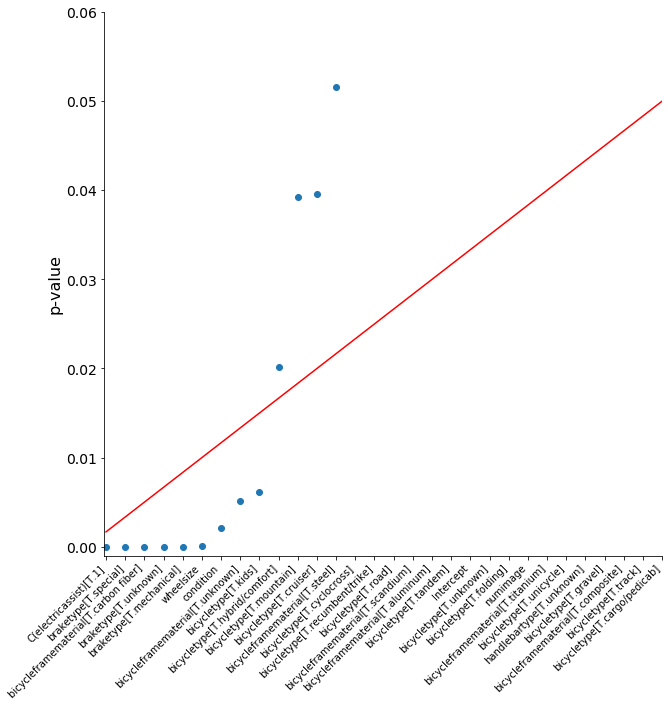

In [72]:
#Let's use the Bonferroni correction to keep only significant variables

final_model = smf.ols(' price ~ + ' + ' + '.join(corr_candidates), data=df).fit()
df_p_values = final_model.summary2().tables[1].sort_values('P>|t|', ascending = True)
#df_p_values = df_p_values[df_p_values['P>|t|']<0.05]
n_vars = len(df_p_values)

plt.figure(figsize=(10, 10))

plt.plot(range(1, n_vars+1), df_p_values['P>|t|'], linewidth=0, marker='o')
plt.plot(range(1, n_vars+1), [0.05*i/n_vars for i in range(1, n_vars+1)], color='red')

plt.ylim([-0.001, 0.06])
plt.xlim([0.9, 15])

plt.xticks(ticks=range(1, n_vars+1), labels=df_p_values.index, rotation=45, ha='right')
plt.yticks(fontsize=14)

plt.ylabel('p-value', fontsize=16)

sns.despine()

In [73]:
#We observe we should keep only the 9 first variables of the model above

df_p_values.index[:9]

Index(['C(electricassist)[T.1]', 'braketype[T.special]',
       'bicycleframematerial[T.carbon fiber]', 'braketype[T.unknown]',
       'braketype[T.mechanical]', 'wheelsize', 'condition',
       'bicycleframematerial[T.unknown]', 'bicycletype[T.kids]'],
      dtype='object')

In [74]:
#Let's compute the adjusted R2 if we continued to add more variables

number_variables = []
R2_list = []
candidates = []
last_max = -1

y = 'price'

while(len(candidates)<len(df.columns)-1):
    dict_r2 = dict()
    for x in df.drop([y] + candidates, axis=1).columns:
        if len(candidates) == 0:
            features = x
        else:
            if df.dtypes[x]==int:
                features = 'C('+ x + ')' + ' + '
            else: 
                features = x + ' + '
            features += ' + '.join(candidates)

        model = sm.ols(y + ' ~ ' + features, df).fit()
        dict_r2[x] = 1-((1-model.rsquared)*(len(df)-1)/(len(df)-len(candidates)-2))

    max_dict_r2 =  max(dict_r2.values())
    max_dict_r2_key = max(dict_r2, key=dict_r2.get)

    if max_dict_r2 > last_max or max_dict_r2 <= last_max:
        candidates.append(max_dict_r2_key)
        last_max = max_dict_r2

        number_variables.append(len(candidates))
        R2_list.append(max_dict_r2)
    else:
        break

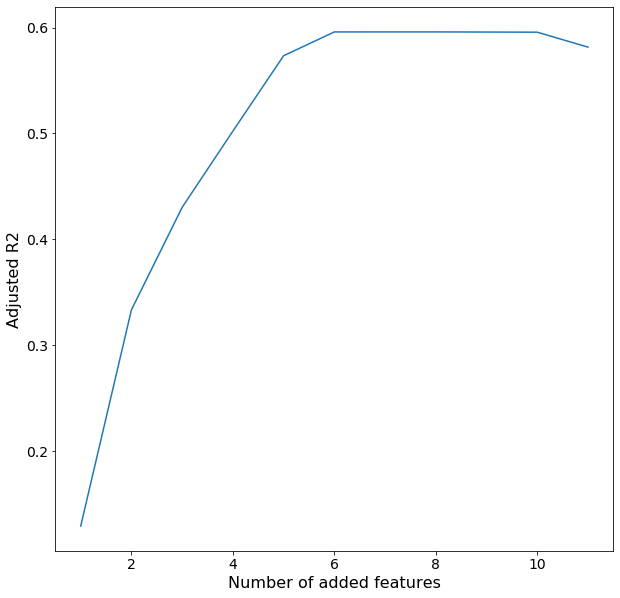

In [75]:
#Let's plot the evolution of the adjusted R2

plt.figure(figsize=(10, 10))
plt.plot(number_variables, R2_list)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Number of added features', fontsize=16)
plt.ylabel('Adjusted R2', fontsize=16)
plt.show()